In [307]:
import pandas as pd
import numpy as np

In [308]:
df=pd.read_csv('Final_DataFrame_2.csv')
df.head()
df_gen=df.drop("discount_price",axis=1)

In [309]:
df_new=df[(df["brand"]=="Dell")]

In [310]:
df_dell=df_new.drop("discount_price",axis=1)

In [311]:
n=len(df_dell)
n=np.arange(n)
df_dell.set_index(n,inplace=True)

In [312]:
re=df_gen.head(5)

In [313]:
import anvil.server
anvil.server.connect("FLFOXM7TTKNPJGHSQ2QXBM3Z-YLT5BRXD5DMDBMFB")

In [280]:
@anvil.server.callable
def search(query):
    result=df_dell['laptop_name']
    ty=df_dell['type']
    if query:
        re=[
            result[x] for x in range(len(result))
            if query in result[x]
            or query in ty[x]
            or query.capitalize() in result[x]
        ]
    return re

In [281]:
def change_history():
    global re
    re=new_re                                           #making re equal to the new changed brower history
  
@anvil.server.callable
def add(lap):                                     #adding searched laptops into the users search history dataframe
    global new_re
    p= df_dell[df_dell['laptop_name']==lap]
    new_re=re.append(p)
    n= len(new_re)
    r=np.arange(0,n)
    new_re=new_re.set_index(r)
    change_history()

In [282]:
ac=pd.read_csv('Accessories.csv')

In [209]:
@anvil.server.callable
def rec_acc(reclap):                                            #recommending other accessories
    l=[]
    df=df_dell[df_dell['laptop_name']==reclap]
    t=df.iloc[0]['type']
    a=ac[ac['type']==t]
    for i in range(len(a)):
        l.append([(a.iloc[i]['name']),a.iloc[i]['description'],a.iloc[i]['price'],a.iloc[i]['image_address']])
        recommended_laps.append((a.iloc[i]['name']))
    return l

In [210]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from operator import itemgetter

In [335]:
data = pd.read_csv("Final_Dataframe_2.csv")
dell_filter = data['brand'] == "Dell"
dellData = data[dell_filter]
dellData
n=len(dellData)
n=np.arange(n)
dellData.set_index(n,inplace=True)

In [340]:
@anvil.server.callable
def modifiedWeights(x):
    global r
    priority = [3,4,5,7,2]
    T = [2,3,4,5,7]
    w = [0, 0, 2, 12, 8, 4, 0, 9, 3, 0, 6]
    old=w
    c = []
    for i in range(len(x)):
        if x[i] == 1:
            c.append(T[i])
    change = [w[2],w[3],w[4],w[5],w[7]]
    lst3 = [value for value in priority if value in c]
    diff = list(set(priority) - set(lst3))
    lst3.extend(diff)
    change.sort(reverse=True)
    for i in range(len(lst3)):
        w[lst3[i]] = change[i]
    r=GetAllRecommendations(old)
    r1=GetAllRecommendations(w)
    rearrangeModified(r,r1)

[['Inspiron 15 3567',
  18490.0,
  '',
  'home'],
 ['Inspiron 15 3581',
  23290.0,
  '',
  'home'],
 ['Inspiron 13 5370',
  31490.0,
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRBAq1xkIZq-LbDjPUzxx3xNTiky-RjbP2F3ALENPNxkWzbBbA&s',
  'home'],
 ['Inspiron 15 3567(v2)',
  25490.0,
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsgGfot455IIZoohrc2TXp76cO8CMsNgX6qCw9akAFji6XqOlr&s',
  'home'],
 ['Inspiron 15 3576',
  22990.0,
  '',
  'gaming'],
 ['Inspiron 15 5570',
  29390.0,
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRBAq1xkIZq-LbDjPUzxx3xNTiky-RjbP2F3ALENPNxkWzbBbA&s',
  'home']]
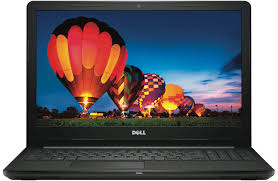
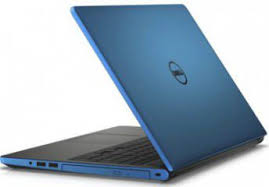
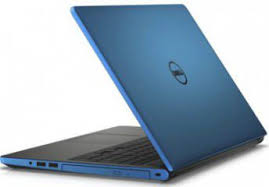

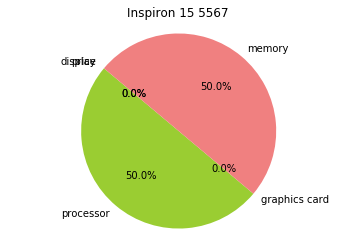

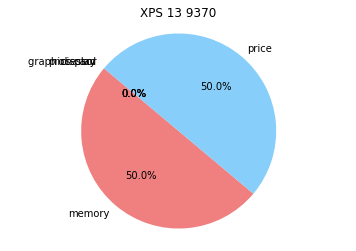

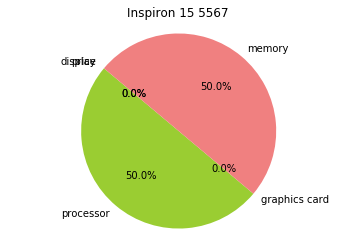

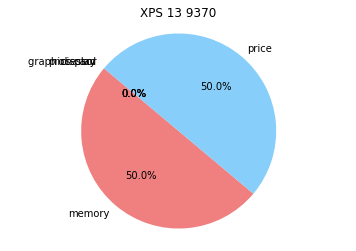

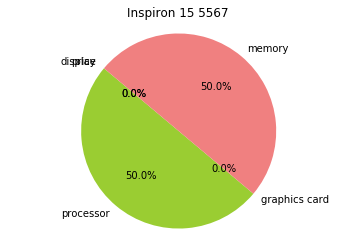

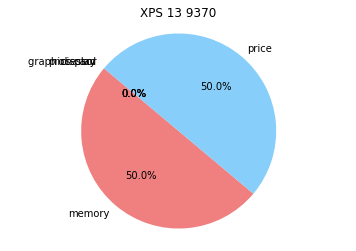

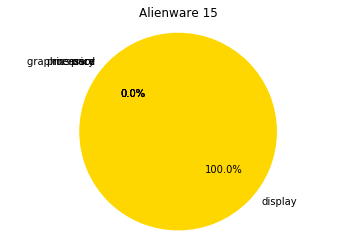

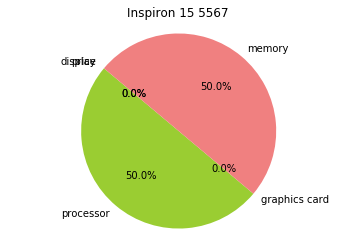

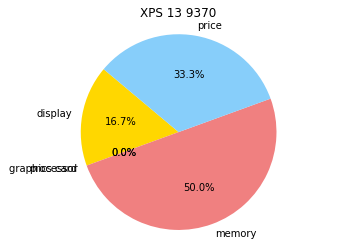

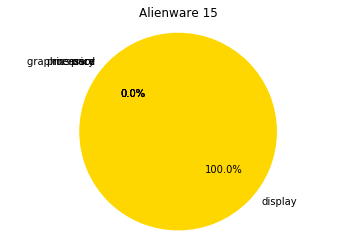

In [343]:
qwe=modifiedWeights([0,0,0,1,0])
qwe

In [298]:
def rearrangeModified(initialRec,newRec):
    rearranged = []
    for i in range(0, len(newRec)):
        flag = 0
        for j in range(0, len(initialRec)):
            if(newRec[i][0] == initialRec[j][0]):
                flag = 1
                #found in previous recommendation
                break
        if(flag == 0):  #if NOT found in previous recommendation, add to new list & append 0 to the end
            newRec[i].append(0)
            rearranged.append(newRec[i])
        else:   #else append 1
            newRec[i].append(1)
    
    for i in range(0, len(newRec)):
        if(newRec[i][-1] == 1):
            rearranged.append(newRec[i])
    
    for i in range(0, len(newRec)):
        del(newRec[i][-1])
    
    return rearranged

In [244]:
def calculateScoreForEachRow(dfRow, weights):
    #this function calculates the score of each laptop in the dell database against the dfRow.
    scores = []
    #in order of the columns:
    #[brand, laptop_name, display_size, processor, graphics, diskSize, discount, price, ratings, image, type]
    #defaultWeights : [0, 0, 2, 12, 8, 4, 0, 9, 3, 0, 6]
    for i in range(0, dellData.shape[0]):
        sumScores = 0
        for j in range(2, 6):
            if(j == 2):
                int1 = dfRow.iloc[j]
                int2 = dellData.iloc[i][j]
                diff = abs(int1 - int2)
                Ratio = (diff/int1)
            elif(j == 7):
                int1 = dfRow.iloc[j]
                int2 = dellData.iloc[i][j]
                diff = abs(int1 - int2)
                Ratio = (diff/int1)
                if(Ratio <= 0.15):
                    Ratio = 1
                else:
                    Ratio = 1 - Ratio
            elif(j == 8):
                int1 = dellData.iloc[i][j]
                Ratio = (int1*2)/10
            else:
                Str1 = dfRow.iloc[j]
                Str2 = dellData.iloc[i][j]
                Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
            sumScores = sumScores + (Ratio*weights[j])/100
        scores.append([sumScores, i])
    scores.sort(key=itemgetter(0))
    scores.reverse()
    return scores[0:6]

In [320]:
browserHistory = re

In [338]:
@anvil.server.callable
def GetAllRecommendations(weights):
    #this function gets 6 recommendations based on each browser history entry
    #and sorts it in decending order.
    recommendations = []
    for i in range(0, browserHistory.shape[0]):
        s = calculateScoreForEachRow(browserHistory.iloc[i], weights)
        for j in range(0, 6):
            recommendations.append(s[j])

    recommendations.sort(key=itemgetter(0))
    recommendations.reverse()
    
    finalRecommend = []
    finalRecommend.append(recommendations[0])
    del(recommendations[0])
    count = 0
    while(count < 5):
        flag = 0
        for i in range(0, len(finalRecommend)):
            if(finalRecommend[i][1] == recommendations[0][1]):
                flag = 1
                break
        if(flag == 1):
            del(recommendations[0])
        else:
            finalRecommend.append(recommendations[0])
            count = count + 1
            del(recommendations[0])

    returnRecommendations = []
    for i in range(0, len(finalRecommend)):
        t = []
        #t.append(finalRecommend[i][1])
        #t.append(finalRecommend[i][0])
        t.append(dellData.iloc[ finalRecommend[i][1] ][1])
        t.append(dellData.iloc[ finalRecommend[i][1] ][7])
        recommended_laps.append(dellData.iloc[finalRecommend[i][1]][1])
        t.append(dellData.iloc[finalRecommend[i][1]][9])
        t.append(dellData.iloc[finalRecommend[i][1]][10])
        returnRecommendations.append(t)
        
    return returnRecommendations
 

In [342]:
@anvil.server.callable
def GetAllRecommendationsIni(weights):
    #this function gets 6 recommendations based on each browser history entry
    #and sorts it in decending order.
    recommendations = []
    for i in range(0, browserHistory.shape[0]):
        s = calculateScoreForEachRow(browserHistory.iloc[i], weights)
        for j in range(0, 6):
            recommendations.append(s[j])

    recommendations.sort(key=itemgetter(0))
    recommendations.reverse()
    
    finalRecommend = []
    finalRecommend.append(recommendations[0])
    del(recommendations[0])
    count = 0
    while(count < 5):
        flag = 0
        for i in range(0, len(finalRecommend)):
            if(finalRecommend[i][1] == recommendations[0][1]):
                flag = 1
                break
        if(flag == 1):
            del(recommendations[0])
        else:
            finalRecommend.append(recommendations[0])
            count = count + 1
            del(recommendations[0])

    returnRecommendations = []
    for i in range(0, len(finalRecommend)):
        t = []
        #t.append(finalRecommend[i][1])
        #t.append(finalRecommend[i][0])
        t.append(dellData.iloc[ finalRecommend[i][1] ][1])
        t.append(dellData.iloc[ finalRecommend[i][1] ][7])
        recommended_laps.append(dellData.iloc[finalRecommend[i][1]][1])
        t.append(dellData.iloc[finalRecommend[i][1]][9])
        t.append(dellData.iloc[finalRecommend[i][1]][10])
        returnRecommendations.append(t)
        
    return returnRecommendations

In [269]:
@anvil.server.callable
def rec_fromDell(current_lap):
    #this function gets 6 recommendations based on each browser history entry
    #and sorts it in decending order.
    recommendations = []
    weights=[0, 0, 2, 12, 8, 4, 0, 9, 3, 0, 6]
    for i in range(len(dellData)):
        if (dellData.at[i,'laptop_name']==current_lap):
            s = calculateScoreForEachRow(dellData.iloc[i], weights)
            for j in range(0, 6):
                recommendations.append(s[j])

    recommendations.sort(key=itemgetter(0))
    recommendations.reverse()
    
    finalRecommend = []
    finalRecommend.append(recommendations[0])
    del(recommendations[0])
    count = 0
    while(count < 5):
        flag = 0
        for i in range(0, len(finalRecommend)):
            if(finalRecommend[i][1] == recommendations[0][1]):
                flag = 1
                break
        if(flag == 1):
            del(recommendations[0])
        else:
            finalRecommend.append(recommendations[0])
            count = count + 1
            del(recommendations[0])

    returnRecommendations = []
    for i in range(0, len(finalRecommend)):
        t = []
        #t.append(finalRecommend[i][1])
        #t.append(finalRecommend[i][0])
        t.append(dellData.iloc[ finalRecommend[i][1] ][1])
        t.append(dellData.iloc[ finalRecommend[i][1] ][7])
        recommended_laps.append(dellData.iloc[finalRecommend[i][1]][1])
        t.append(dellData.iloc[finalRecommend[i][1]][9])
        returnRecommendations.append(t)
        
    return returnRecommendations
 

In [270]:
recommended_laps

['Inspiron 15 3567',
 'Inspiron 15 3581',
 'XPS 13 9370',
 'XPS 13 9360 v1',
 'Inspiron 15 3582',
 'Inspiron 14 5480',
 'XPS 13 9370',
 'XPS 13 9380 v2',
 'XPS 13 9380 v1',
 'XPS 13 9360 v1',
 'Inspiron 15 3567',
 'Inspiron 15 3581',
 'Alienware Advanced Gaming Mouse: AW558',
 'Alienware Pro Gaming Keyboard: AW768',
 'Alienware Wireless Gaming Headset | AW988',
 'Inspiron 15 3567(v10',
 'Alienware 15',
 'Inspiron 15 3567(v2)',
 'Inspiron 15 3576',
 'New Dell G3 15 3590 Gaming',
 'Inspiron 15 5567',
 'Inspiron 15 3567(v10',
 'Alienware 15',
 'Inspiron 15 3567(v2)',
 'Inspiron 15 3576',
 'New Dell G3 15 3590 Gaming',
 'Inspiron 15 5567',
 'Inspiron 15 3567(v10',
 'Alienware 15',
 'Inspiron 15 3567(v2)',
 'Inspiron 15 3576',
 'New Dell G3 15 3590 Gaming',
 'Inspiron 15 5567',
 'Inspiron 15 3567',
 'Inspiron 15 3581',
 'XPS 13 9370',
 'XPS 13 9360 v1',
 'Inspiron 15 3582',
 'Inspiron 14 5480',
 'Inspiron 15 3567',
 'Inspiron 15 3581',
 'XPS 13 9370',
 'XPS 13 9360 v1',
 'Inspiron 15 3582',

In [222]:
global y
global n
y=0
n=0
@anvil.server.callable
def order_conv():
    global y
    global n
    for i in cart:                            #finding the number of recommendations in the cart
        if (i in recommended_laps):
            y=y+1
        else:
            n=n+1
    histogram(y,n)
    return y,n
import matplotlib.pyplot as plt
%matplotlib inline
def histogram(y,n):
    tick_label = ["Converted","Non Converted"]
    height = [y,n]
    left = [1, 2]
    plt.bar(left, height, tick_label = tick_label, width = 0.4, color = ['green', 'red'])
    plt.ylabel('Number of Laptops')  
    plt.title('ORDER CONVERSIONS')
    plt.savefig('C:/Users/Mallika/Desktop/Seriously Academics/Internships/DELL/histogram.png')
    plt.show()


In [223]:
global price
price=0

In [233]:
global cart
cart=[]

@anvil.server.callable
def add_cart(cartlap):
    global price
    cart.append(cartlap)
    for i in range(len(df_dell)):
        if (df_dell.iloc[i][1]==cartlap):
            price=price+df_dell.at[i,'old_price']
    for i in range(len(ac)):
        if (ac.at[i,'name']==cartlap):
            price=price+ac.at[i,'price']
price

36956.0

In [225]:
@anvil.server.callable
def disp(lap):
    l=[]
    for i in range(len(df_dell)):
        if(df_dell.at[i,'laptop_name']==lap):
            l=[lap, df_dell.at[i,'processor_type'], df_dell.at[i,'graphics_card'],df_dell.at[i,'disk_space'],df_dell.at[i,'old_price'],df_dell.at[i,'type'],df_dell.at[i,'image_address']]
    return l


['Dell Wireless Mouse-WM126 - Blue']

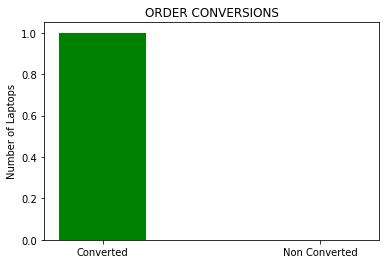

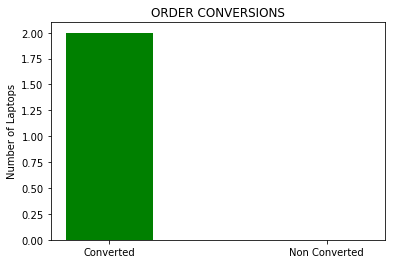

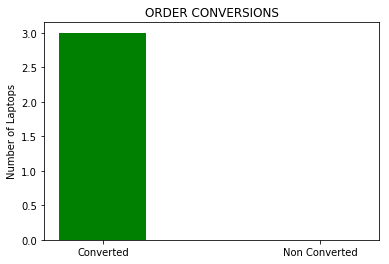

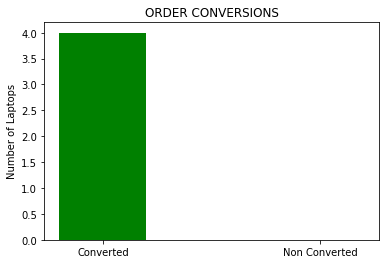

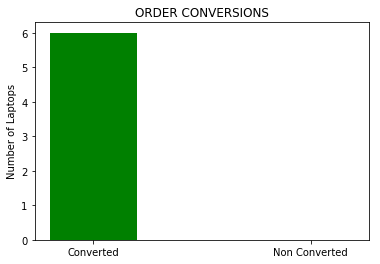

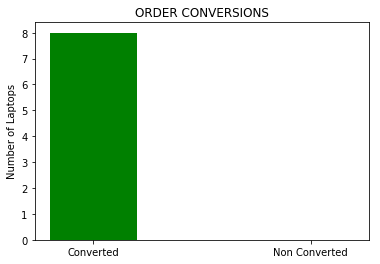

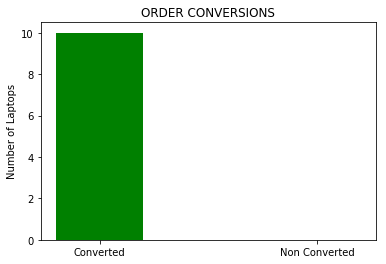

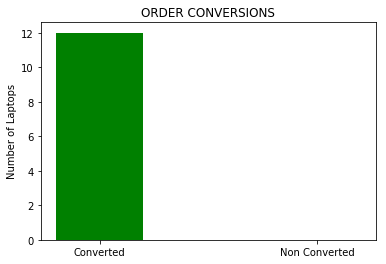

In [235]:
cart

In [347]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
sr= stopwords.words('english')
import matplotlib.pyplot as plt
col_names =  ["laptop","display", "processor", "graphics card","memory","price"]
df_pie  = pd.DataFrame(columns = col_names)

In [348]:
@anvil.server.callable
def pie(l,rev,mytext):
    global df_pie
    v = [0,0,0,0,0]
    cc = 0
    for i in range(len(rev)):
        if(rev[i]==1):
            v[i] = v[i] + 1
    mytext = mytext.lower()
    mytext = word_tokenize(mytext)
    for i in range(0,len(mytext)):
        mytext[i] = lemmatizer.lemmatize(mytext[i])
    vocab = ["display", "processor", "graphics card","memory","price"]
    tokens = mytext
    clean_tokens = tokens[:]
    for token in tokens:
        if token in stopwords.words('english'):   
            clean_tokens.remove(token)
    for i in range(0,len(clean_tokens)):
        for j in range(0,len(vocab)):
            c = vocab[j].find(clean_tokens[i])
            if(c>-1):
                v[j] = v[j] + 1
    for i in range(len(df_pie)):
        if(l == df_pie['laptop'][i]):
            cc = 1
            for j in range(1,6):
                df_pie.iloc[i,j] = df_pie.iloc[i,j] + v[j-1]
            break
    if(cc == 0):
        new_row = {"laptop":l,"display":v[0], "processor":v[1], "graphics card":v[2],"memory":v[3],"price":v[4]}
        df_pie = df_pie.append(new_row,ignore_index=True)
    update_pie(df_pie)

In [344]:
print(df_pie)

             laptop display processor graphics card memory price
0  Inspiron 15 5567       0         1             0      1     0
1       XPS 13 9370       1         0             0      3     2
2      Alienware 15       1         0             0      0     0


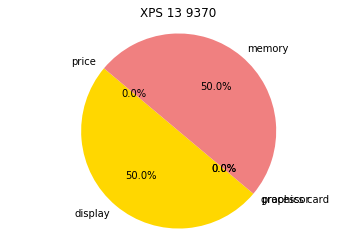

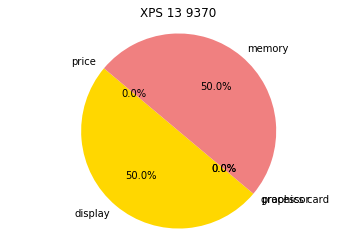

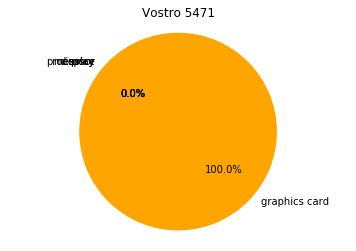

In [349]:
def update_pie(df_pie):
    for i in range(len(df_pie)):
        sizes = [0,0,0,0,0]
        sum = 0
        for j in range(1,6):
            sum = sum + df_pie.iloc[i,j]
        for j in range(0,5):
            sizes[j] = (df_pie.iloc[i,j+1] * 360)/sum
        # Data to plot
        labels = "display", "processor", "graphics card","memory","price"
        colors = ['gold', 'yellowgreen', 'orange', 'lightcoral', 'lightskyblue']
        plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
        plt.title(df_pie.iloc[i,0])
        plt.axis('equal')
        plt.savefig('C:/Users/Mallika/Desktop/Seriously Academics/Internships/DELL/pie.png')
        plt.show()

[0, 0, 4, 12, 2, 9, 0, 8, 3, 0, 6]